# Exercício 3

Temos um pedaço de papelão que é de 14 cm por 10 cm, e queremos cortar os cantos, como mostrado abaixo, e dobrar os lados para formar uma caixa, também mostrado abaixo. Determinar a altura da caixa que resulta um volume máximo.

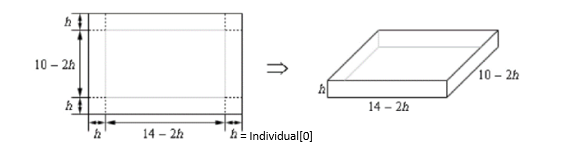


## Instalar pacote DEAP

In [3]:
!pip install deap

# Importar bibliotecas necessárias

In [4]:
import matplotlib.pyplot as plt
from deap import base, creator, tools
import pandas as pd
import operator
import random
import numpy
import math

# Função objetivo

   - Função objetivo com objetivo de maximizar a area

In [5]:
def objective_function(individual):
    volume = (14 - 2 * individual[0]) * (10 - 2 * individual[0]) * individual[0]
    return volume,

# Restrição do problema


   - Verificar partícula - restrições impostas as partículas
       - Há uma restrição do tamanho quanto a dimensões negativas:
          - (14 - 2h) > 0
          - (10 - 2h) > 0









In [6]:
def feasible(individual):
  if individual[0] > 5:
    return False
  return True

## Criando a função de Minimização e a estrutura da partícula

In [7]:
#  função objetivo: nome, tipo(f.o.), o peso deve ser 1.0 para esse caso (função de maximização)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=list, smin=None, smax=None, best=None) # smin e smax são limites de speed. best é a melhor até o momento.

## Definindo uma função para gerar a partícula

In [8]:
# Função que cria uma partícula inicializando os atributos aleatoriamente.
# size é o número de variáveis de decisão, pmin e pmax são os limites das variáveis, smin e smax são os limites de velocidade
def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

## Definindo a função para atualização da partícula 

In [9]:
# Esta função calcula a velocidade, os limites de veloicidade e a nova posição da partícula
# phi1 = fator cognitivo e phi2 = fator social
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part)) # indo em direção ao melhor conhecido pela partícula
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part)) # indo em direção ao melhor da vizinhaça
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[i] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[i] = math.copysign(part.smax, speed)
    part[:] = list(map(operator.add, part, part.speed))

## Criando o toolbox

In [10]:
toolbox = base.Toolbox()

# Função para gerar a partícula com valores 
toolbox.register("particle", generate, size=2, pmin=0, pmax=5, smin=-3, smax=3)

# Adicionando a função para gerar a população
toolbox.register("population", tools.initRepeat, list, toolbox.particle)

# Adicionando a função para atualizar a população
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)

# Adicionando as funções para avaliar a população
toolbox.register("evaluate", objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, -1000000))

## Definindo parêmetros para o PSO

   - **initial_population:** Número de inidivíduos da população inicial
   - **num_gen:** Número de iterações
   - **best:** Melhor partícula

In [11]:
initial_population = 100    
num_ite = 1000
best = None

### Criando a população inicial

In [12]:
# inicializando a população
pop = toolbox.population(n=initial_population)

### Estatísticas de avaliação (a cada geração)

   - Função objetivo
   - Média
   - Desvio padrão
   - Mínimo
   - Máximo

In [13]:
# estatísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

### Definindo um log para avaliar as partículas ao longo das iterações

In [14]:
logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

## Otimização

In [15]:
# Roda a otimização
for iteration in range(num_ite):
    for part in pop:
        part.fitness.values = toolbox.evaluate(part)
        # atualiza melhor da partícula
        if not part.best or part.best.fitness < part.fitness:
            part.best = creator.Particle(part)
            part.best.fitness.values = part.fitness.values
        # atualiza melhor global
        if not best or best.fitness < part.fitness:
            best = creator.Particle(part)
            best.fitness.values = part.fitness.values
    for part in pop:
        toolbox.update(part, best)

    # Salva todos os fitnesses em uma lista e imprime o status
    logbook.record(gen=iteration, evals=len(pop), **stats.compile(pop))
    print(logbook.stream)

gen	evals	avg    	std    	min    	max    
0  	100  	75.0645	38.2274	2.17535	120.146
1  	100  	-39936.4	195972 	-1e+06 	120.164
2  	100  	-19963.6	140005 	-1e+06 	120.156
3  	100  	-39944.5	195971 	-1e+06 	120.164
4  	100  	-19954  	140007 	-1e+06 	120.164
5  	100  	-69948.1	255161 	-1e+06 	120.159
6  	100  	-19950.6	140007 	-1e+06 	120.162
7  	100  	-19953.3	140007 	-1e+06 	120.164
8  	100  	-39945.2	195970 	-1e+06 	120.164
9  	100  	-29963.5	170594 	-1e+06 	120.154
10 	100  	44.4224 	229.569	-2091.6	120.164
11 	100  	-19965.4	140005 	-1e+06 	119.968
12 	100  	-9942.96	99504.6	-1e+06 	120.164
13 	100  	43.4601 	119.811	-723.869	120.164
14 	100  	-29943.9	170597 	-1e+06  	120.164
15 	100  	-29946.9	170597 	-1e+06  	120.164
16 	100  	-9949.43	99503.9	-1e+06  	120.164
17 	100  	-29945.3	170597 	-1e+06  	120.164
18 	100  	-19954.6	140007 	-1e+06  	120.164
19 	100  	-19954.4	140007 	-1e+06  	120.159
20 	100  	24.8709 	215.751	-1905.91	120.079
21 	100  	-29949.3	170596 	-1e+06  	120.006
22 	

## Melhor indivíduo

In [16]:
#print('Base: ', best[0])
print('Altura: ', best[0])


Altura:  1.9183347889664972


## Avaliação do melhor indivíduo

In [24]:
print("Dimensões")
print('L1: ', 14-2*best[0])
print('L2: ', 10-2*best[0])
print('h : ', best[0])
print('Volume: ', objective_function(best)[0])

Dimensões
L1:  10.163330422067006
L2:  6.1633304220670055
h :  1.9183347889664972
Volume:  120.16442131481041


In [25]:
(14-2*best[0])*(10-2*best[0])*(best[0])

120.16442131481041